In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

from tensorflow.keras import metrics

In [2]:
import tensorflow
print(tensorflow.__version__)

2.5.0


In [3]:
# transform the data into the right format
pollution_data = pd.read_csv("dati/NO2.csv")
pollution_data





datetime  NO2 (Biossido di azoto)
0     2020-01-01 00:00:00                     16.0
1      2020-01-01 1:00:00                     26.0
2      2020-01-01 2:00:00                     25.0
3      2020-01-01 3:00:00                     24.0
4      2020-01-01 4:00:00                     32.0
...                   ...                      ...
6930  2020-10-15 20:00:00                     43.0
6931  2020-10-15 21:00:00                     37.0
6932  2020-10-15 22:00:00                     38.0
6933  2020-10-15 23:00:00                     33.0
6934  2020-10-16 00:00:00                     30.0

[6935 rows x 2 columns]

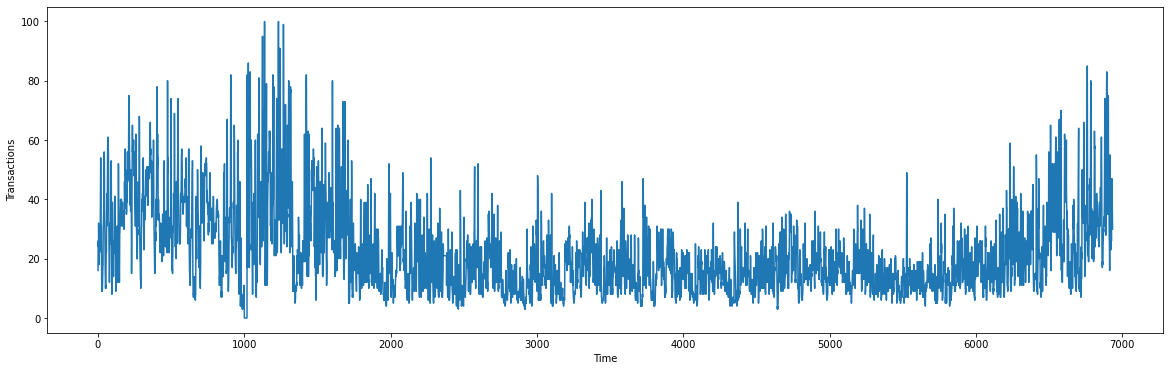

In [4]:
# visualize the data to be sure about it. 
plt.figure(figsize = (20, 6))
plt.xlabel("Time")
plt.ylabel("Transactions")

plt.plot(pollution_data["NO2 (Biossido di azoto)"])
plt.show()

In [6]:
series = pollution_data["NO2 (Biossido di azoto)"].values

### Prepare data for the machine learnig process.

In [12]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# choose a number of time steps
n_steps_in, n_steps_out = 24, 24

# split into samples
X, y = split_sequence(series, n_steps_in, n_steps_out)

count = 0
for i in range(len(X)):
    print(X[i], y[i])
    count += 1
    if count > 2: break
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

[16. 26. 25. 24. 32. 21. 18. 26. 29. 29. 22. 23. 27. 24. 23. 28. 36. 49.
 54. 48. 32. 26. 31. 23.] [14. 12.  9. 11.  9.  9. 10. 14. 15. 18. 18. 29. 31. 33. 35. 40. 46. 51.
 56. 55. 42. 34. 32. 28.]
[26. 25. 24. 32. 21. 18. 26. 29. 29. 22. 23. 27. 24. 23. 28. 36. 49. 54.
 48. 32. 26. 31. 23. 14.] [12.  9. 11.  9.  9. 10. 14. 15. 18. 18. 29. 31. 33. 35. 40. 46. 51. 56.
 55. 42. 34. 32. 28. 20.]
[25. 24. 32. 21. 18. 26. 29. 29. 22. 23. 27. 24. 23. 28. 36. 49. 54. 48.
 32. 26. 31. 23. 14. 12.] [ 9. 11.  9.  9. 10. 14. 15. 18. 18. 29. 31. 33. 35. 40. 46. 51. 56. 55.
 42. 34. 32. 28. 20. 16.]


In [14]:
split_size = int(len(X)* 0.75)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:],y[split_size:]

### Define a Convolutional Neural Network 

In [15]:
# define model
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2)) 
model.add(Flatten())
model.add(Dense(100, activation='relu')) 
model.add(Dense(n_steps_out)) 
model.compile(optimizer='adam', loss='mse')

# fit model
history = model.fit(X_train, y_train, validation_split=0.33,batch_size=64, epochs=150, verbose=2)

Epoch 1/150
55/55 - 1s - loss: 244.2284 - val_loss: 47.6415
Epoch 2/150
55/55 - 0s - loss: 165.4194 - val_loss: 45.7955
Epoch 3/150
55/55 - 0s - loss: 157.8804 - val_loss: 44.0697
Epoch 4/150
55/55 - 0s - loss: 152.4249 - val_loss: 43.2387
Epoch 5/150
55/55 - 0s - loss: 149.6747 - val_loss: 42.7425
Epoch 6/150
55/55 - 0s - loss: 147.8626 - val_loss: 42.6742
Epoch 7/150
55/55 - 0s - loss: 146.8035 - val_loss: 42.4993
Epoch 8/150
55/55 - 0s - loss: 145.0829 - val_loss: 42.1262
Epoch 9/150
55/55 - 0s - loss: 143.6614 - val_loss: 45.0403
Epoch 10/150
55/55 - 0s - loss: 143.2528 - val_loss: 41.7787
Epoch 11/150
55/55 - 0s - loss: 140.9562 - val_loss: 44.6647
Epoch 12/150
55/55 - 0s - loss: 140.8111 - val_loss: 41.9959
Epoch 13/150
55/55 - 0s - loss: 140.4475 - val_loss: 41.2241
Epoch 14/150
55/55 - 0s - loss: 139.5792 - val_loss: 41.5901
Epoch 15/150
55/55 - 0s - loss: 138.9544 - val_loss: 41.6696
Epoch 16/150
55/55 - 0s - loss: 138.7557 - val_loss: 42.3388
Epoch 17/150
55/55 - 0s - loss: 1

Epoch 135/150
55/55 - 0s - loss: 114.9356 - val_loss: 44.7090
Epoch 136/150
55/55 - 0s - loss: 112.6285 - val_loss: 55.5157
Epoch 137/150
55/55 - 0s - loss: 114.5902 - val_loss: 46.1586
Epoch 138/150
55/55 - 0s - loss: 112.6797 - val_loss: 44.2624
Epoch 139/150
55/55 - 0s - loss: 112.0384 - val_loss: 46.8602
Epoch 140/150
55/55 - 0s - loss: 111.9624 - val_loss: 43.5123
Epoch 141/150
55/55 - 0s - loss: 113.5766 - val_loss: 46.1910
Epoch 142/150
55/55 - 0s - loss: 112.0285 - val_loss: 43.6482
Epoch 143/150
55/55 - 0s - loss: 111.6811 - val_loss: 45.2795
Epoch 144/150
55/55 - 0s - loss: 111.0694 - val_loss: 45.2902
Epoch 145/150
55/55 - 0s - loss: 111.1050 - val_loss: 45.6349
Epoch 146/150
55/55 - 0s - loss: 111.8902 - val_loss: 44.2126
Epoch 147/150
55/55 - 0s - loss: 110.7567 - val_loss: 44.9001
Epoch 148/150
55/55 - 0s - loss: 110.4886 - val_loss: 47.7218
Epoch 149/150
55/55 - 0s - loss: 111.4570 - val_loss: 46.4456
Epoch 150/150
55/55 - 0s - loss: 110.7539 - val_loss: 45.2191


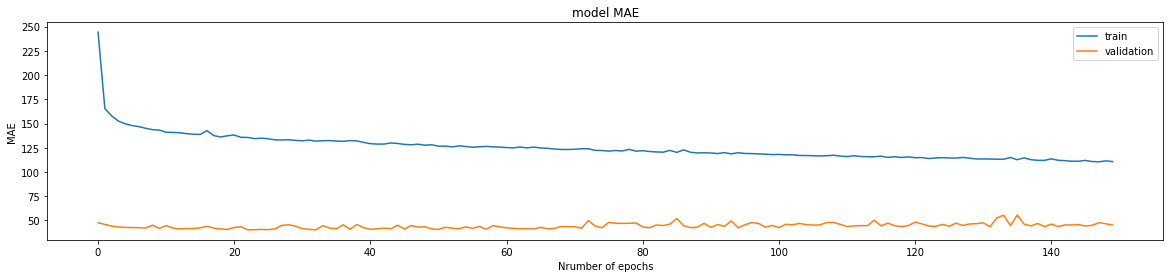

In [16]:
plt.figure(figsize = (20, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('Nrumber of epochs')
plt.legend(["train", "validation"], loc ="upper right")
plt.show()

In [18]:
# demonstrate prediction
x_input = np.array([ 16., 26., 25., 24., 32., 21. ,18. ,26. ,29., 29. ,22., 23., 27. ,24., 23., 28.,
                    36., 49.,54., 48. ,32. ,26., 31., 23.])
x_input = x_input.reshape((1, n_steps_in, n_features)) 
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[26.43438  28.649601 31.694439 33.30083  34.090294 32.734512 30.702227
  28.734217 27.118132 25.213076 23.691118 25.025545 25.684937 26.224665
  28.745468 32.18148  37.393692 42.32769  42.55678  39.872467 34.202457
  27.29126  24.52882  21.110134]]


### Computing the forecasting error

In [19]:
predicted = np.array([])

for i in range(len(X_test)):
    x_input = X_test[i].reshape((1, n_steps_in, n_features))
    yhat = model.predict(x_input, verbose=0)
    predicted = np.append(predicted, yhat[0]) 

#predicted = predicted.reshape(-1, 1)    
expected = y_test  
expected = np.reshape(expected, (expected.shape[0]*expected.shape[1]))

### Visualizing the forecasting error

Mean Absolute Error =  6.796320680329851


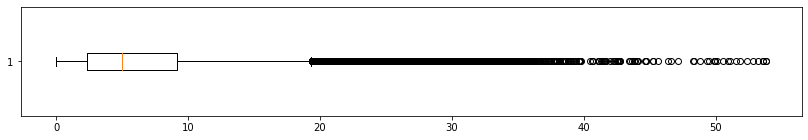

In [20]:
# abs difference
difference = abs((expected - predicted))
print('Mean Absolute Error = ', np.mean(difference))
# show boxplot
plt.figure(figsize = (14,2))
plt.boxplot(difference, vert= False);
plt.show()